 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [27]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [28]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [29]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [30]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [31]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [32]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [33]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_df.sort_index(ascending=False)
sp500_df.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [34]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [35]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [37]:
# Calculate Daily Returns
returns_sp500 = sp500_df.pct_change()
returns_sp500.tail()

,Close
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


In [38]:
# Drop nulls
returns_sp500.dropna(inplace=True)
returns_sp500.tail()

,Close
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


In [39]:
# Rename Column
returns_sp500 = returns_sp500.rename(columns={"Close" : "S&P_500"})
returns_sp500.head()

,S&P_500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [40]:
# Concatenate all DataFrames into a single DataFrame

combined_returns_cols = pd.concat([whale_df, algo_df, returns_sp500], axis = 'columns', join='inner')
combined_returns_cols = combined_returns_cols.dropna()
combined_returns_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

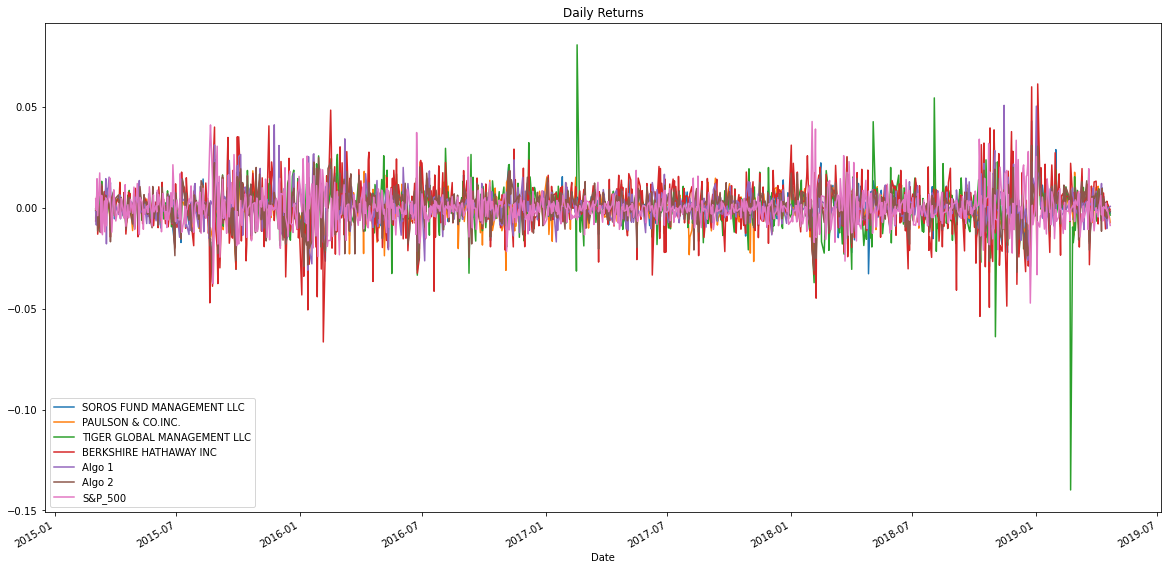

In [41]:
# Plot daily returns
combined_returns_cols.plot(kind='line', figsize=(20,10), title='Daily Returns')

#change x-axis

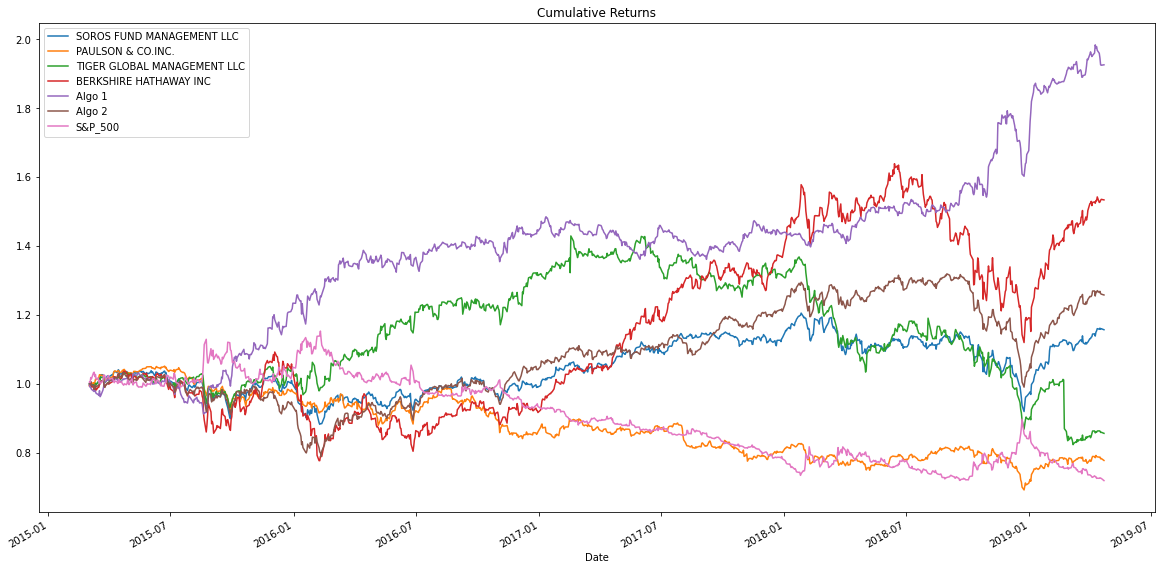

In [42]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns_cols).cumprod()
cumulative_returns.plot(kind='line', figsize=(20,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

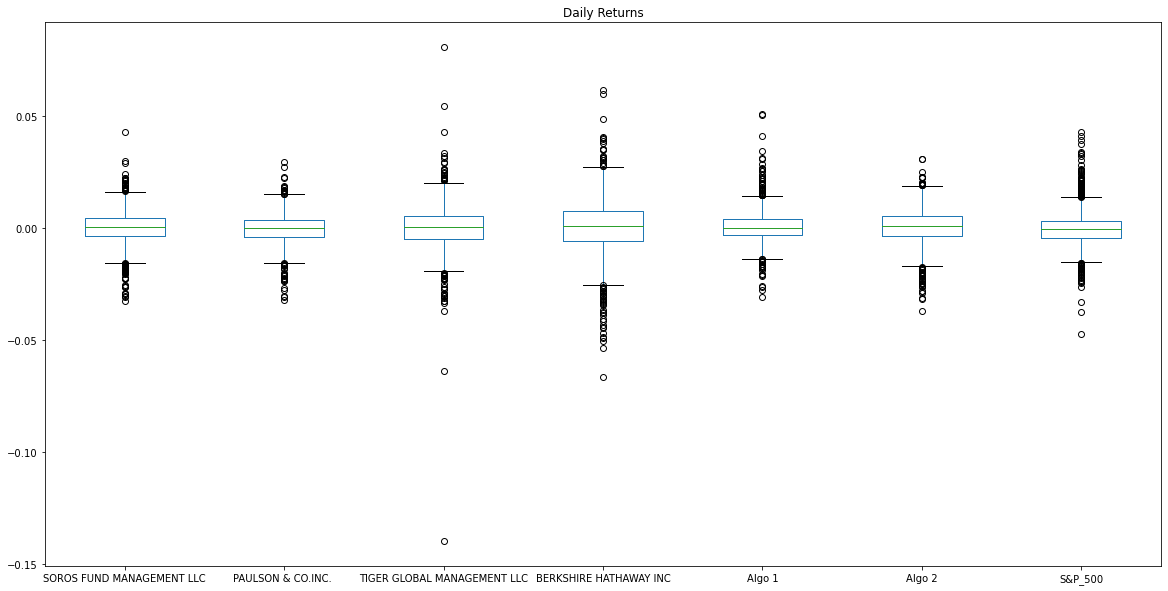

In [52]:
# Box plot to visually show risk

# Plot STD

combined_returns_cols.plot(kind='box', figsize=(20,10), title='Daily Returns')

#cumulative_returns.plot(kind='box', figsize=(20,10), title='Cumulative Returns')

In [44]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

combined_returns_cols_std = combined_returns_cols.std()
combined_returns_cols_std.sort_values(ascending = True)

#print("Tiger & Bershire risker than the S&P500")

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P_500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [45]:
# THIS CANT BE RIGHT
print("Tiger Global Management LLC & Berkshire Hathaway Inc risker than the S&P 500")

Tiger Global Management LLC & Berkshire Hathaway Inc risker than the S&P 500


In [46]:
# Determine which portfolios are riskier than the S&P 500

# call dataframe and then > against specific S&P500 / column

combined_returns_cols_std > combined_returns_cols_std["S&P_500"]

#paulson_risk = "PAULSON & CO. INC." > "S&P_500"
#Algo_1_risk = "Algo 1" > "S&P_500"
#SOROS_risk = "SOROS FUND MANAGMENT LLC" > "S&P_500"
#Algo_2_risk = "Algo 2" > "S&P_500"
#Tiger_risk = "TIGER GLOBAL MANAGEMENT LLC" > "S&P_500"
#Berk_risk = "BERKSHIRE HATHAWAY INC" > "S&P_500"

# print(f'PAULSON & CO. INC.:', (paulson_risk)) 
# print(f'Algo 1:', (Algo_1_risk))
# print(f'SOROS FUND MANAGEMENT LLC:', (SOROS_risk))
# print(f'Algo 2:', (Algo_2_risk))
# print(f'TIGER GLOBAL MANAGEMENT LLC:', (Tiger_risk))
# print(f'BERKSHIRE HATHAWAY INC:', (Berk_risk))




SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P_500                        False
dtype: bool

In [47]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_cols.std() * np.sqrt(252)
annualized_std.sort_values(ascending = True)

#these are slightly off...?


PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P_500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

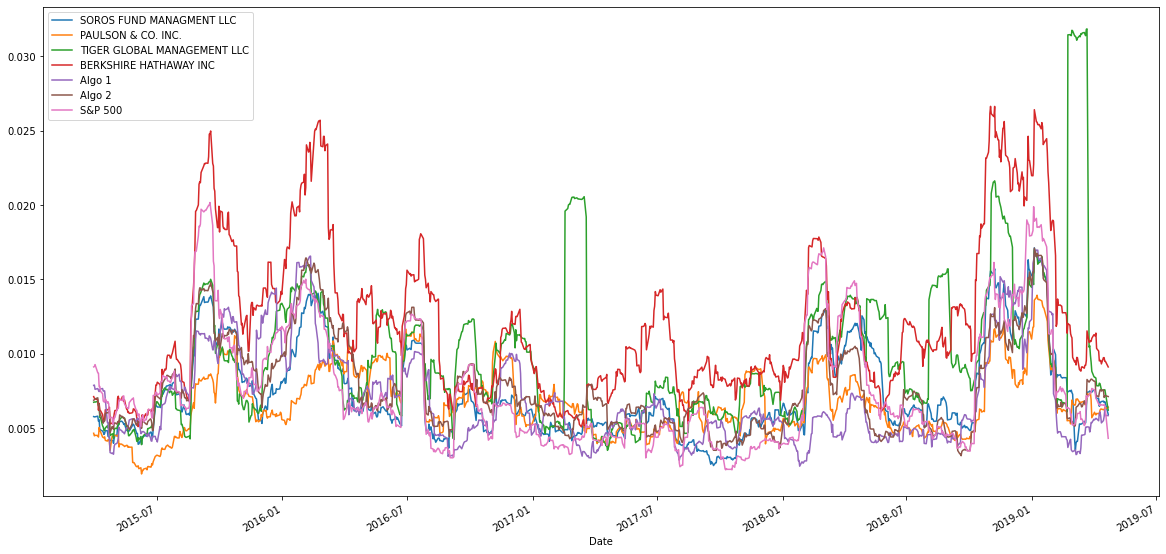

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
#whale_df.rolling(window=21).std().plot()
#returns_sp500.rolling(window=21).std().plot()

#whale_df and returns_sp500().rolling(window=21).std().plot()

ax = combined_returns_cols.rolling(window=21).std().plot(figsize=(20,10))
#returns_sp500.rolling(window=21).std().plot(ax=ax)

ax.legend(['SOROS FUND MANAGMENT LLC', 
           'PAULSON & CO. INC.', 
           'TIGER GLOBAL MANAGEMENT LLC', 
           'BERKSHIRE HATHAWAY INC',
           'Algo 1',
           'Algo 2',
           'S&P 500'])


# SOMETHING WRONG WITH DAYS

In [27]:
# Construct a correlation table
correlation = combined_returns_cols.corr()
correlation.round(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P_500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


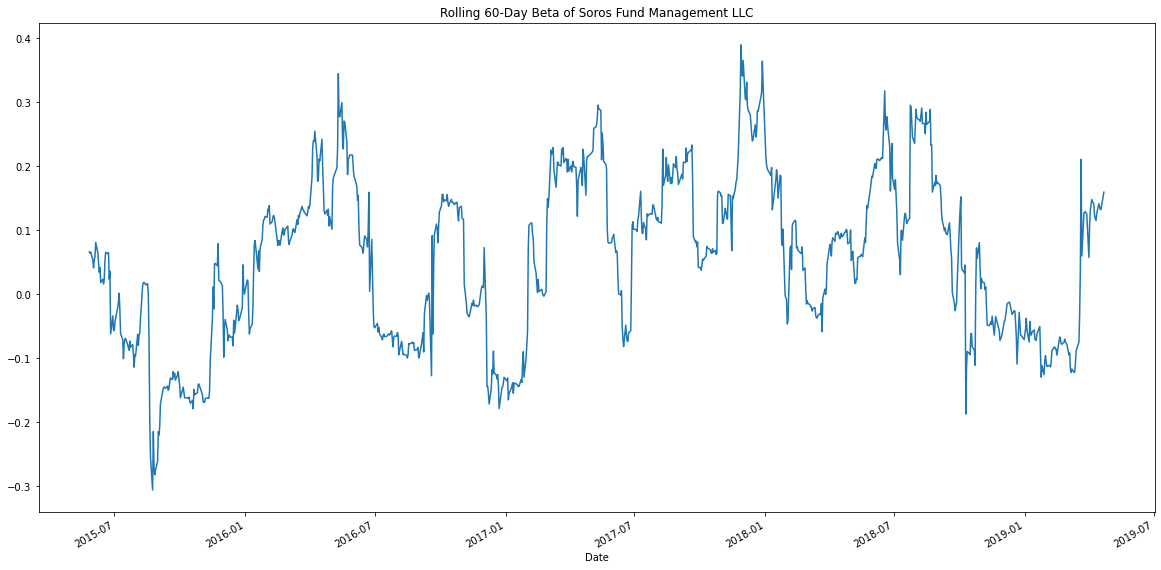

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Soros selected
# calculate rolling 60 day covariance
# calculate rolling 60 day variance
# calculate rolling 60 day beta
# Plot rolling beta

rolling_covariance = combined_returns_cols['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_cols['S&P_500'])

rolling_variance = combined_returns_cols['S&P_500'].rolling(window=60).var()

rolling_beta_soros = rolling_covariance / rolling_variance

rolling_beta_soros.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund Management LLC')

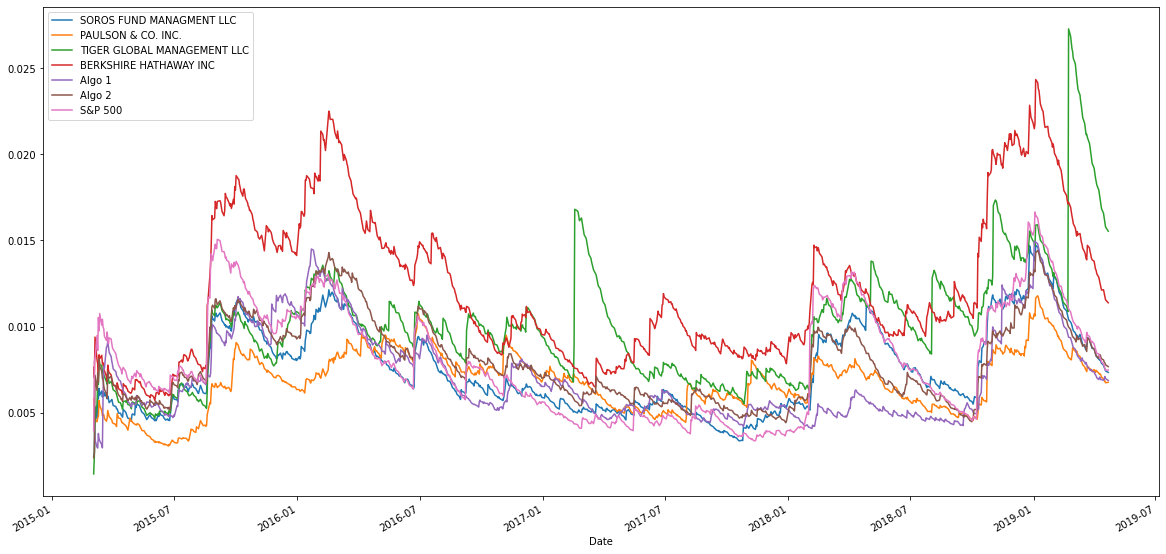

In [51]:
# Calculate a rolling window using the exponentially weighted moving average. 

# rolling window of what??

#ax = combined_returns_cols.rolling(window=ewm).std().plot(figsize=(20,10))
# ewm
# YOUR CODE HERE

ax = combined_returns_cols.ewm(halflife=21).std().plot(figsize=(20,10))

ax.legend(['SOROS FUND MANAGMENT LLC', 
           'PAULSON & CO. INC.', 
           'TIGER GLOBAL MANAGEMENT LLC', 
           'BERKSHIRE HATHAWAY INC',
           'Algo 1',
           'Algo 2',
           'S&P 500'])

# That looks angry...?

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [40]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

sharpe_combined_df = (combined_returns_cols.mean()*252)/(combined_returns_cols.std()*np.sqrt(252))
sharpe_combined_df

# Results slightly off...

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P_500                       -0.518582
dtype: float64

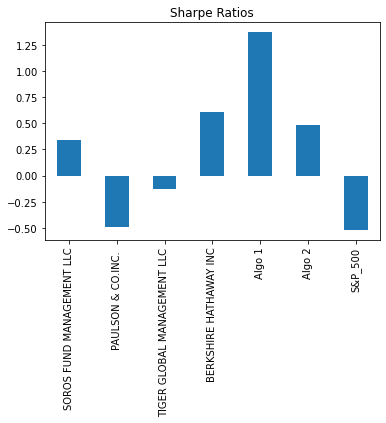

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_combined_df.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

### Algo 1 outperforms both the market and whales but Algo 2 does not

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [5]:
# Read the first stock
# YOUR CODE HERE
jpm_returns_csv = Path("Resources/jpm.csv")
jpm_df = pd.read_csv(jpm_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
jpm_df.head()

,Symbol,Close
Date,,
2012-01-03,JPM,34.98
2012-01-04,JPM,34.95
2012-01-05,JPM,35.68
2012-01-06,JPM,35.36
2012-01-09,JPM,35.30


In [6]:
# Read the second stock
# YOUR CODE HERE
stt_returns_csv = Path("Resources/stt.csv")
stt_df = pd.read_csv(stt_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
stt_df.head()

,Symbol,Close
Date,,
2012-01-03,STT,41.82
2012-01-04,STT,41.30
2012-01-05,STT,41.76
2012-01-06,STT,41.76
2012-01-09,STT,41.77


In [7]:
# Read the third stock
ntrs_returns_csv = Path("Resources/ntrs.csv")
ntrs_df = pd.read_csv(ntrs_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
ntrs_df.head()

,Symbol,Close
Date,,
2012-01-03,ntrs,40.66
2012-01-04,ntrs,40.61
2012-01-05,ntrs,40.96
2012-01-06,ntrs,41.01
2012-01-09,ntrs,41.41


In [10]:
# Concatenate all stocks into a single DataFrame
combined_df = pd.concat([jpm_df, stt_df, ntrs_df], axis = 'rows', join='inner')
combined_df = combined_df.dropna()
combined_df.head()

# test that all came in
# combined_df.tail()

,Symbol,Close
Date,,
2019-12-23,ntrs,106.40
2019-12-24,ntrs,106.71
2019-12-26,ntrs,106.57
2019-12-27,ntrs,106.99
2019-12-30,ntrs,106.32


In [20]:
# Reset the index
combined_df.set_index(jpm_df['Date'])
combined_df.head()


KeyError: 'Date'

In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Drop Nulls
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

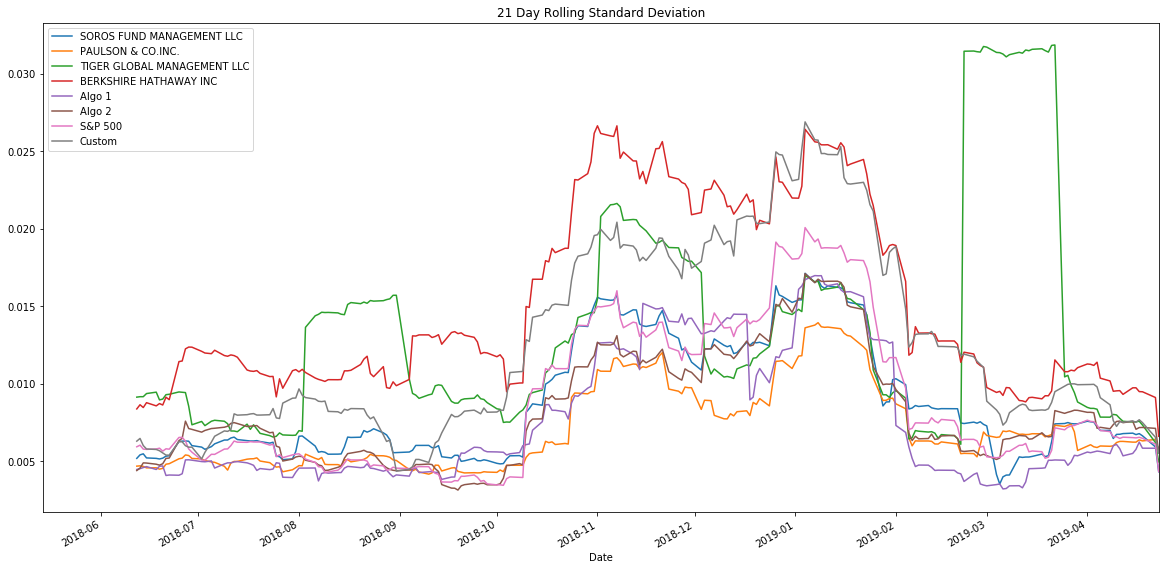

In [39]:
# Rolling
# YOUR CODE HERE

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

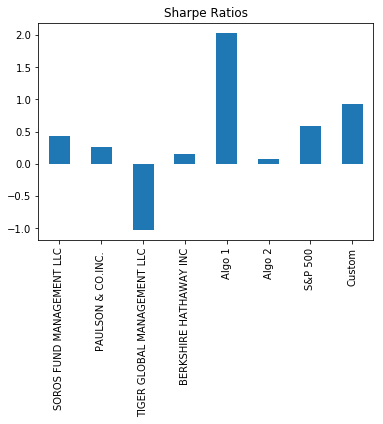

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


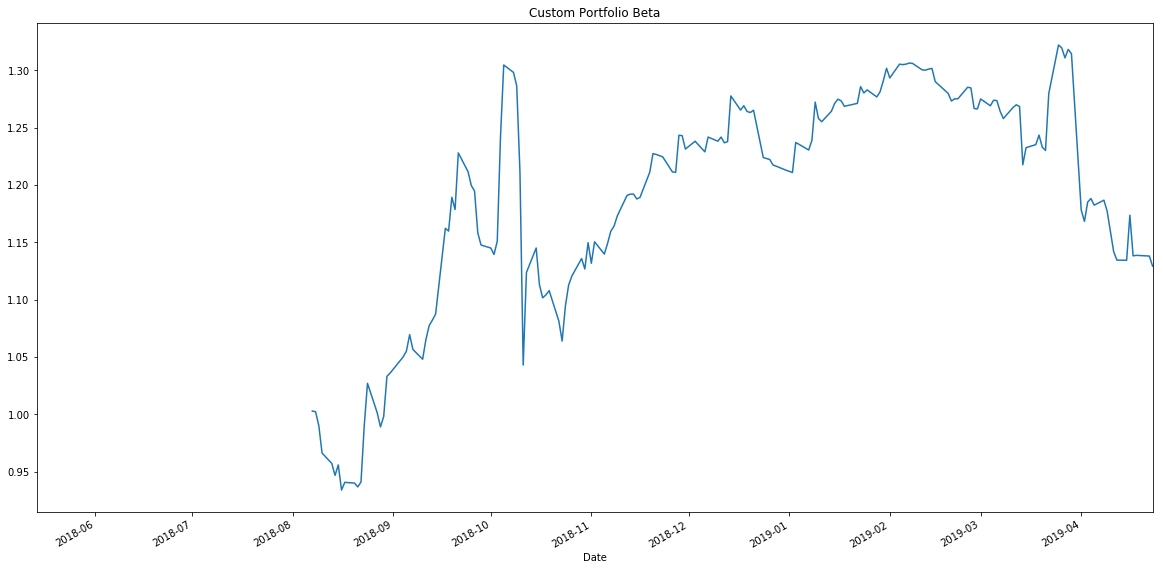

In [43]:
# Beta
# YOUR CODE HERE